In [1]:
# collect all functions
import glob
import json

unique = dict()
total_count = 0
total = {}
result = []
best_repo = ""
max_res = 0
for res_file in glob.glob("/Users/sergeykatkovskiy/Desktop/docker_results/*"):
    with open(res_file, 'r') as r_file:
        cur_res = json.load(r_file)
        total_count += len(cur_res.keys())
        repo = res_file[:res_file.find('_')]
        if len(cur_res) > max_res:
            max_res = len(cur_res)
            best_repo = res_file
        for func_name in cur_res:
            total.setdefault(func_name, 0)
            total[func_name] += 1

            if cur_res[func_name].get('text', None) is not None:
                unique.setdefault(func_name, set())
                if cur_res[func_name]['text'] not in unique[func_name]:
                    unique[func_name].add(cur_res[func_name]['text'])
                    cur_res[func_name].pop('line')
                    result.append(cur_res[func_name])
print(len(result))

7654


In [ ]:
# collect some metrics

# count of processed repositories
# mean length
# most common imports
# mean count of functions in repository
# average number of received arguments and their output values

In [47]:
print(f"Total count of processed repositories: "
      f"{len(glob.glob('/Users/sergeykatkovskiy/Desktop/docker_results/*'))}")

Total count of processed repositories: 1493


In [63]:
# mean count of functions in repository
print(f"Mean count of traced functions in repository: "
      f"{len(result) / len(glob.glob('/Users/sergeykatkovskiy/Desktop/docker_results/*'))}")

Mean count of traced functions in repository: 5.1265907568653715


In [62]:
# mean length
total_len = 0
max_len = 0
min_len = 10000000
func_count = len(result)

for func in result:
    total_len += len(func['text'])
    max_len = max(len(func['text']), max_len)
    min_len = min(len(func['text']), min_len)

print(f"Mean length of functions: {total_len / func_count}")
print(f"Max length of functions: {max_len}")
print(f"Min length of functions: {min_len}")


Mean length of functions: 580.7883459628952
Max length of functions: 20512
Min length of functions: 22


In [31]:
import pandas as pd
from matplotlib import pyplot as plt
# most common imports
imports_counter = {}
for func in result:
    for import_string in func['imports']:
        split_import = import_string.strip().split()
        if split_import[0] in ['from', 'import']:
            imports_counter.setdefault(split_import[1], 0)
            imports_counter[split_import[1]] += 1


Text(0, 0.5, 'Number of appearances')

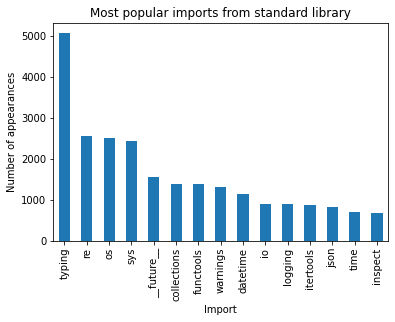

In [61]:
pd.DataFrame(imports_counter.items()).sort_values(by=[1], ascending=False).head(15).plot(x=0, y=1, kind="bar",
                                                                                         legend=None)
plt.title("Most popular imports from standard library")
plt.xlabel("Import")
plt.ylabel("Number of appearances")


In [50]:
# average number of received arguments and their output values
# remove duplicates from args
import json

total_count = 0
unqiue_count = 0
func_count = len(result)

for func_result in result:
    unique_args = set()
    cur_args = []
    for args_set in func_result['args']:
        if json.dumps(args_set) not in unique_args:
            unique_args.add(json.dumps(args_set))
    total_count += len(func_result['args'])
    unqiue_count += len(unique_args)

print(f"Mean count of args: {total_count / func_count}.\n "
      f"Mean count of unique args: {unqiue_count / func_count}")

Mean count of args: 6.679905931539064.
 Mean count of unique args: 6.679905931539064


In [51]:
# remove duplicates from args
import json

filtered_res = []
for func_result in result:
    unique_args = set()
    cur_args = []
    for args_set in func_result['args']:
        if json.dumps(args_set) not in unique_args:
            cur_args.append(args_set)
            unique_args.add(json.dumps(args_set))
            if len(unique_args) >= 15:
                break
    func_result['args'] = cur_args
    filtered_res.append(func_result)
print(len(filtered_res))

7654


In [107]:
def check_value_serialization(val, imports):
    try:
        exec(f"x = {val}")
        return True
    except:
        return False


def filter_args(arg_ret_list, imports):
    none_ret_count = 0
    for cur_args_ret in arg_ret_list:
        # check if class method
        if "self" in cur_args_ret["func_args"].keys():
            return False

        arg_list = cur_args_ret["func_args"]
        ret_val = cur_args_ret.get("return_value", "None")

        # check return value
        if not check_value_serialization(ret_val, imports):
            return False

        none_ret_count += 1 if ret_val == "None" else 0
        # check all args
        for arg in arg_list.values():
            if not check_value_serialization(arg, imports):
                return False

    if none_ret_count == len(arg_ret_list):
        return False

    return True



In [113]:
base_res = []
std_res = []

for i in result:
    if filter_args(i['args'], []):
        base_res.append(i)
    else:
        std_res.append(i)


<string>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<string>:1: SyntaxWarning: 'int' object is not callable; perhaps 

In [114]:
len(base_res)

6349

In [115]:
len(std_res)

1305

In [159]:
pprint(base_res[4000])

{'args': [{'func_args': {'extra': "b'igqditjauxix@restmail.net'",
                         'name': "b'quickStretch'"},
           'return_value': "b'identity.mozilla.com/picl/v1/quickStretch:igqditjauxix@restmail.net'"},
          {'func_args': {'extra': 'None', 'name': "'authPW'"},
           'return_value': "b'identity.mozilla.com/picl/v1/authPW'"}],
 'imports': [],
 'text': 'def hkdf_namespace(name, extra=None):\n'
         '    """Construct a HKDF key namespace string from the given simple '
         'name.\n'
         '\n'
         '    Each use of HKDF to derive keys from a master secret should use '
         'a unique\n'
         '    string for the "info" parameter, to ensure that different keys '
         'are\n'
         '    generated for different purposes.  This function prepends an '
         'application-\n'
         '    specific URI to the given name components to generate a '
         '(hopefully)\n'
         '    globally-unique info string.\n'
         '    """\n'
 

In [161]:
pprint(std_res[251])

{'args': [{'func_args': {'dt': 'datetime.datetime(2017, 7, 24, 18, 18, 19)',
                         'epoch': 'datetime.datetime(1970, 1, 1, 0, 0)'},
           'return_value': '1500920299'},
          {'func_args': {'dt': 'datetime.datetime(2017, 7, 24, 18, 18, 19)',
                         'epoch': 'datetime.datetime(1970, 1, 1, 0, 0)'},
           'return_value': '1500920299'},
          {'func_args': {'dt': 'datetime.datetime(2017, 7, 24, 18, 18, 19)',
                         'epoch': 'datetime.datetime(1970, 1, 1, 0, 0)'},
           'return_value': '1500920299'},
          {'func_args': {'dt': 'datetime.datetime(2015, 8, 4, 10, 34, 46)',
                         'epoch': 'datetime.datetime(1970, 1, 1, 0, 0)'},
           'return_value': '1438684486'},
          {'func_args': {'dt': 'datetime.datetime(2020, 1, 1, 0, 0)',
                         'epoch': 'datetime.datetime(1970, 1, 1, 0, 0)'},
           'return_value': '1577836800'},
          {'func_args': {'dt': 'datetime.da

In [162]:
pprint(std_res[255])

{'args': [{'func_args': {'op': '<built-in function eq>'},
           'return_value': 'True'},
          {'func_args': {'op': '<built-in function eq>'},
           'return_value': 'True'}],
 'imports': ['from operator import add',
             'from operator import and_',
             'from operator import contains',
             'from operator import eq',
             'from operator import ge',
             'from operator import getitem',
             'from operator import gt',
             'from operator import inv',
             'from operator import le',
             'from operator import lshift',
             'from operator import lt',
             'from operator import mod',
             'from operator import mul',
             'from operator import ne',
             'from operator import neg',
             'from operator import or_',
             'from operator import rshift',
             'from operator import sub',
             'from operator import truediv'],
 'text': 'def is_

In [168]:
pprint(std_res[304])

{'args': [{'func_args': {'lineno': '1027',
                         'node': '<_ast.Module object at 0x7f3cde5ccb20>'},
           'return_value': '(1027, 1029)'},
          {'func_args': {'lineno': '6',
                         'node': '<_ast.Module object at 0x7f3cc5ae7fd0>'},
           'return_value': '(6, None)'},
          {'func_args': {'lineno': '117',
                         'node': '<_ast.Module object at 0x7f3ceb818310>'},
           'return_value': '(117, 118)'},
          {'func_args': {'lineno': '1027',
                         'node': '<_ast.Module object at 0x7f3cd20637f0>'},
           'return_value': '(1027, 1029)'},
          {'func_args': {'lineno': '6',
                         'node': '<_ast.Module object at 0x7f3cec0ad0d0>'},
           'return_value': '(6, None)'},
          {'func_args': {'lineno': '150',
                         'node': '<_ast.Module object at 0x7f3ccc07eeb0>'},
           'return_value': '(150, 151)'},
          {'func_args': {'lineno': '1027